Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


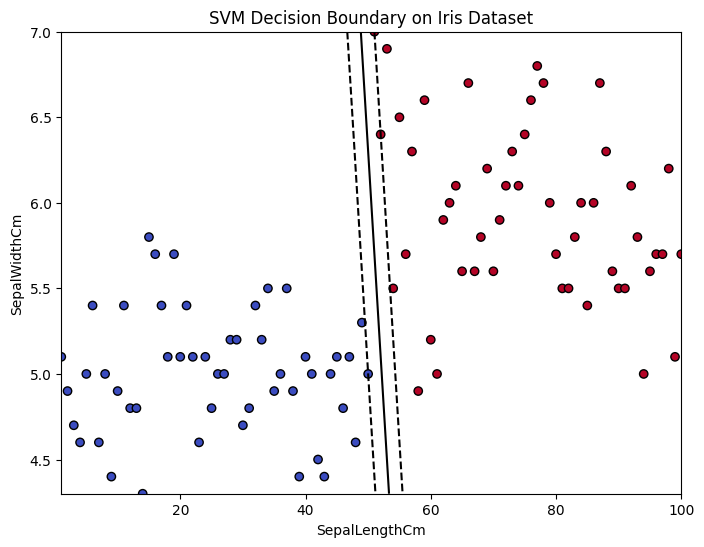

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

# 1. Load Dataset
iris = pd.read_csv("/content/drive/My Drive/Iris.csv")  # Load dataset from CSV

# Check column names to confirm structure
print(iris.columns)

# Fix column selection
df = iris.copy()  # Directly use the DataFrame
df.rename(columns={'Species': 'species'}, inplace=True)  # Ensure consistent naming

# Convert categorical species names to numeric values
df['species'] = pd.factorize(df['species'])[0]  # Converts categories to numbers


# Use only two classes (Binary Classification)
df = df[df['species'] < 2]  # Select class 0 and 1
X = df.iloc[:, [0, 1]].values  # Use first two features for visualization
y = df['species'].values

# 2. Train SVM Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = svm.SVC(kernel='linear')  # Linear Kernel
model.fit(X_train, y_train)

# 3. Visualize Decision Boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'], colors='black')

# Scatter plot of training data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel(df.columns[1])  # ✅ Use column names from DataFrame
plt.ylabel(df.columns[2])  # ✅ Use column names from DataFrame

plt.title("SVM Decision Boundary on Iris Dataset")
plt.show()






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
